In [400]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [401]:
path = '/Users/aponamaryov/GitHub/squeezeDet/data/sample.png'
img = cv2.imread(path)
print(img.shape)

(375, 1242, 3)


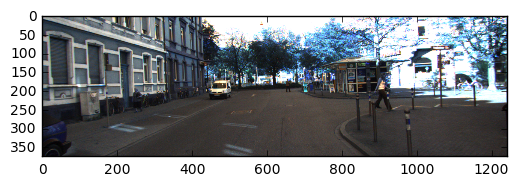

In [402]:
plt.imshow(img)

In [403]:
hight, width = 50, 100
boxes = []
for x in xrange(0,img.shape[1], width):
    for y in xrange(0, img.shape[0], hight):
        box = np.array([x,y,
                        np.minimum(x+width-1, img.shape[1]),np.minimum(y+hight-1, img.shape[0])])
        boxes.append(box)
boxes = np.array(boxes)
print(boxes.shape)

(104, 4)


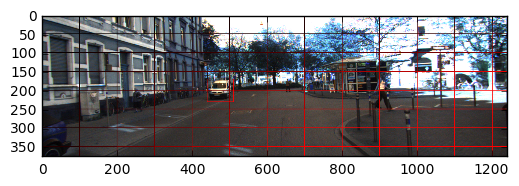

In [404]:
for b in boxes:
    img = cv2.rectangle(img, (b[0], b[1]), (b[2], b[3]), int(b[2]*b[3]/1000.0), thickness=1)

gtbox = [440, 170, 510, 230]
img = cv2.rectangle(img, (gtbox[0],gtbox[1]), (gtbox[2], gtbox[3]), 256, thickness=1)
plt.imshow(img)

In [405]:
lr = np.maximum(np.minimum(boxes[:,2], gtbox[2]) - np.maximum(boxes[:,0], gtbox[0]), 0)
print("lr [linear]:")
print(lr)
tb = np.maximum(np.minimum(boxes[:,3], gtbox[3]) - np.maximum(boxes[:,1], gtbox[1]), 0)
print("tb [tabular]:")
print(tb)

lr [linear]:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 59 59 59 59 59 59 59 59 10 10 10 10 10 10 10 10  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
tb [tabular]:
[ 0  0  0 29 30  0  0  0  0  0  0 29 30  0  0  0  0  0  0 29 30  0  0  0  0
  0  0 29 30  0  0  0  0  0  0 29 30  0  0  0  0  0  0 29 30  0  0  0  0  0
  0 29 30  0  0  0  0  0  0 29 30  0  0  0  0  0  0 29 30  0  0  0  0  0  0
 29 30  0  0  0  0  0  0 29 30  0  0  0  0  0  0 29 30  0  0  0  0  0  0 29
 30  0  0  0]


In [406]:
inter = lr * tb
union = ( (boxes[:,2]-boxes[:,0]) * (boxes[:,3]-boxes[:,1]) ) + ( (gtbox[2]-gtbox[0])*(gtbox[3]-gtbox[1]) ) - inter
iou = inter / union.astype(np.float)
aidx = np.argsort(iou)[::-1][:4]
print(aidx)
print(iou[aidx])

[36 35 44 43]
[ 0.24309848  0.23310627  0.0342818   0.03310124]


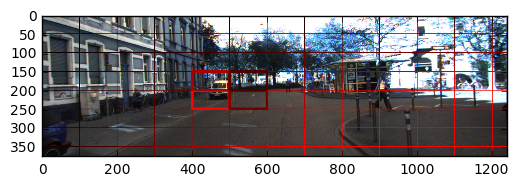

In [407]:
for idx in range(len(aidx)):
    b = boxes[aidx[idx]]
    img = cv2.rectangle(img, (b[0], b[1]), (b[2], b[3]), 256*(0.6666**idx), thickness=5)
    
plt.imshow(img)